<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-cad_equipo93/blob/main/Semana4_actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Principal Components Analasys (PCA)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
credit_card = pd.read_csv("/content/default of credit card clients.csv", index_col=0)
df=credit_card.copy()
df.isnull().values.any()

True

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X2      29958 non-null  float64
 2   X3      29958 non-null  float64
 3   X4      29958 non-null  float64
 4   X5      29958 non-null  float64
 5   X6      29958 non-null  float64
 6   X7      29958 non-null  float64
 7   X8      29958 non-null  float64
 8   X9      29958 non-null  float64
 9   X10     29958 non-null  float64
 10  X11     29958 non-null  float64
 11  X12     29958 non-null  float64
 12  X13     29958 non-null  float64
 13  X14     29958 non-null  float64
 14  X15     29958 non-null  float64
 15  X16     29958 non-null  float64
 16  X17     29958 non-null  float64
 17  X18     29958 non-null  float64
 18  X19     29958 non-null  float64
 19  X20     29958 non-null  float64
 20  X21     29958 non-null  float64
 21  X22     29958 non-null  float64
 22

In [ ]:
df_num=df.iloc[:]

In [ ]:
df_num.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.024212,-0.219120,-0.107801,0.144515,-0.271201,-0.296206,-0.286245,-0.267371,-0.249340,...,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567,-0.153781
X2,0.024212,1.000000,0.014701,-0.031478,-0.091259,-0.057637,-0.070690,-0.065648,-0.059586,-0.054319,...,-0.021854,-0.017056,-0.016733,-0.000297,-0.001517,-0.008630,-0.002369,-0.001775,-0.002911,-0.039730
X3,-0.219120,0.014701,1.000000,-0.143431,0.175079,0.105636,0.121632,0.114012,0.108640,0.097220,...,-0.000566,-0.007625,-0.009192,-0.037385,-0.030007,-0.039953,-0.038263,-0.040276,-0.037189,0.028109
X4,-0.107801,-0.031478,-0.143431,1.000000,-0.413926,0.019747,0.024052,0.032430,0.032826,0.035360,...,-0.023292,-0.025371,-0.021206,-0.005705,-0.008016,-0.003399,-0.012516,-0.001052,-0.006571,-0.024544
X5,0.144515,-0.091259,0.175079,-0.413926,1.000000,-0.039432,-0.050154,-0.053249,-0.049865,-0.054006,...,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533,0.013881
X6,-0.271201,-0.057637,0.105636,0.019747,-0.039432,1.000000,0.672290,0.574706,0.539384,0.509783,...,0.179138,0.180651,0.176992,-0.079230,-0.070083,-0.070460,-0.063934,-0.058104,-0.058616,0.324769
X7,-0.296206,-0.070690,0.121632,0.024052,-0.050154,0.672290,1.000000,0.766857,0.662429,0.622990,...,0.222216,0.221287,0.219339,-0.080771,-0.058981,-0.055864,-0.046856,-0.037049,-0.036491,0.263761
X8,-0.286245,-0.065648,0.114012,0.032430,-0.053249,0.574706,0.766857,1.000000,0.777245,0.686447,...,0.227518,0.225453,0.222608,0.001210,-0.066784,-0.053294,-0.046001,-0.035813,-0.035816,0.235765
X9,-0.267371,-0.059586,0.108640,0.032826,-0.049865,0.539384,0.662429,0.777245,1.000000,0.819655,...,0.246180,0.243161,0.239379,-0.009475,-0.001893,-0.069260,-0.043421,-0.033630,-0.026537,0.217037
X10,-0.249340,-0.054319,0.097220,0.035360,-0.054006,0.509783,0.622990,0.686447,0.819655,1.000000,...,0.272062,0.269916,0.262614,-0.006199,-0.003139,0.009061,-0.058267,-0.033325,-0.022982,0.204549


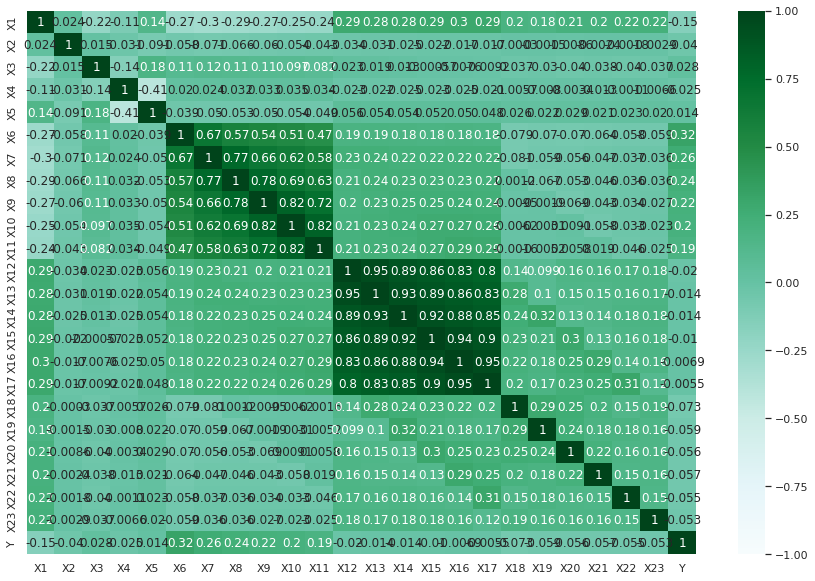

In [ ]:
import seaborn as sns
corrs=df_num.corr()

sns.set(rc={"figure.figsize":(15,10)})
sns.heatmap(corrs, vmin=-1, vmax=1, cmap ="BuGn", annot=True)

Concluimos que nuestras variables con mayor correlación serían el importe del estado de cuenta de abril a septiembre de 2005
X12=Importe estado de cuenta septiembre 2005
X13=Importe estado de cuenta agosto 2005
X14=Importe estado de cuenta julio 2005
X15=Importe estado de cuenta junio 2005
X16=Importe estado de cuenta mayo 2005
X17=Importe estado de cuenta abril 2005

Así también el historial de pagos se encuentra correlacioado. 
X6=estatus de pago en septiembre de 2005
X7=estatus de pago en agosto de 2005
X8=estatus de pago en julio de 2005
X9=estatus de pago en junio de 2005
X10=estatus de pago en mayo de 2005
X11=estatus de pago en abril de 2005

Dónde paga puntual es -1 y si tiene retraso = 1, dos meses =2, ... 9 meses = 9

In [ ]:
Cols= ["X1", "X2", "X3", "X4", "X5", "X18", "X19", "X20", "X21", "X22", "X23" ] # definimos la lista de variables que nos interesa analizar

In [ ]:
summary={
    "Varianzas": df_num[Cols].var()[0:11],
    "Valor Min": df_num[Cols].min()[0:11],
    "Valor Max": df_num[Cols].max()[0:11]
}
pd.DataFrame(summary, index=Cols).transpose()

,X1,X2,X3,X4,X5,X18,X19,X20,X21,X22,X23
Varianzas,1.683177e+10,0.239189,0.624845,0.272434,84.903672,2.745259e+08,5.315784e+08,3.103706e+08,2.457434e+08,2.336481e+08,3.164479e+08
Valor Min,1.000000e+04,1.000000,0.000000,0.000000,21.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Valor Max,1.000000e+06,2.000000,6.000000,3.000000,79.000000,8.735520e+05,1.684259e+06,8.960400e+05,6.210000e+05,4.265290e+05,5.286660e+05


In [ ]:
t=df_num.var().sum()

var_X1=df_num.X1.var()
var_X2=df_num.X2.var()
var_X3=df_num.X3.var()
var_X4=df_num.X4.var()
var_X5=df_num.X5.var()
var_X18=df_num.X18.var()
var_X19=df_num.X19.var()
var_X20=df_num.X20.var()
var_X21=df_num.X21.var()
var_X22=df_num.X22.var()
var_X23=df_num.X23.var()

print("varianza Total \t\t:",t.round(2))
print("varianza X1 \t\t:",((var_X1/t)*100).round(2),"%")
print("varianza X2 \t\t:",((var_X2/t)*100).round(2),"%")
print("varianza X3 \t\t:",((var_X3/t)*100).round(2),"%")
print("varianza X4 \t\t:",((var_X4/t)*100).round(2),"%")
print("varianza X5 \t\t:",((var_X5/t)*100).round(2),"%")
print("varianza X18 \t\t:",((var_X18/t)*100).round(2),"%")
print("varianza X19 \t\t:",((var_X19/t)*100).round(2),"%")
print("varianza X20 \t\t:",((var_X20/t)*100).round(2),"%")
print("varianza X21 \t\t:",((var_X21/t)*100).round(2),"%")
print("varianza X22 \t\t:",((var_X22/t)*100).round(2),"%")
print("varianza X23 \t\t:",((var_X23/t)*100).round(2),"%")


varianza Total 		: 45450192702.69
varianza X1 		: 37.03 %
varianza X2 		: 0.0 %
varianza X3 		: 0.0 %
varianza X4 		: 0.0 %
varianza X5 		: 0.0 %
varianza X18 		: 0.6 %
varianza X19 		: 1.17 %
varianza X20 		: 0.68 %
varianza X21 		: 0.54 %
varianza X22 		: 0.51 %
varianza X23 		: 0.7 %


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled=scaler.fit_transform(df_num)
scaled[:5]

array([[-1.13736269,  0.8096885 ,  0.18584882, -1.05708615, -1.24628151,
         1.79464177,  1.78258329, -0.69667977, -0.66663037, -1.53070038,
        -1.48651337, -0.64249667, -0.64735943, -0.66792529, -0.67241933,
        -0.66303081, -0.65271388, -0.34188963, -0.22713422, -0.29678248,
        -0.30810735, -0.31412418, -0.29348473,  1.87668918],
       [-0.36656147,  0.8096885 ,  0.18584882,  0.85883054, -1.0292244 ,
        -0.874468  ,  1.78258329,  0.13943643,  0.18924143,  0.23563523,
         1.99391629, -0.65920548, -0.66669659, -0.63920112, -0.62158315,
        -0.6062287 , -0.59798248, -0.34188963, -0.21364509, -0.24001926,
        -0.24431534, -0.31412418, -0.18105373,  1.87668918],
       [-0.59780183,  0.8096885 ,  0.18584882,  0.85883054, -0.16099598,
         0.01523526,  0.11194994,  0.13943643,  0.18924143,  0.23563523,
         0.25370146, -0.29873773, -0.49394006, -0.48243607, -0.44976246,
        -0.41727743, -0.39174531, -0.25027025, -0.19195838, -0.24001926,
  

In [ ]:
scaled_df = pd.DataFrame(scaled, columns=df_num.columns)
scaled_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.137363,0.809689,0.185849,-1.057086,-1.246282,1.794642,1.782583,-0.696680,-0.666630,-1.530700,...,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485,1.876689
1,-0.366561,0.809689,0.185849,0.858831,-1.029224,-0.874468,1.782583,0.139436,0.189241,0.235635,...,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054,1.876689
2,-0.597802,0.809689,0.185849,0.858831,-0.160996,0.015235,0.111950,0.139436,0.189241,0.235635,...,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407,-0.532853
3,-0.906122,0.809689,0.185849,-1.057086,0.164590,0.015235,0.111950,0.139436,0.189241,0.235635,...,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269,-0.532853
4,-0.906122,-1.235043,0.185849,-1.057086,2.335161,-0.874468,0.111950,-0.696680,0.189241,0.235635,...,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314,-0.532853


In [ ]:
summary={
    "Varianzas": scaled_df[Cols].var()[0:11],
    "Valor Min": scaled_df[Cols].min()[0:11],
    "Valor Max": scaled_df[Cols].max()[0:11]
}
pd.DataFrame(summary, index=Cols).transpose()

,X1,X2,X3,X4,X5,X18,X19,X20,X21,X22,X23
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-1.214443,-1.235043,-2.344330,-2.973003,-1.571867,-0.341890,-0.257018,-0.296782,-0.308107,-0.314124,-0.293485
Valor Max,6.416489,0.809689,5.246207,2.774747,4.722789,52.381623,72.795041,50.565325,39.306732,27.590403,29.425741


{'whiskers': [<matplotlib.lines.Line2D at 0x7f37457de2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37458ee1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f374590a690>],
 'medians': [<matplotlib.lines.Line2D at 0x7f373c0c0650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f373c0c03d0>],
 'means': []}

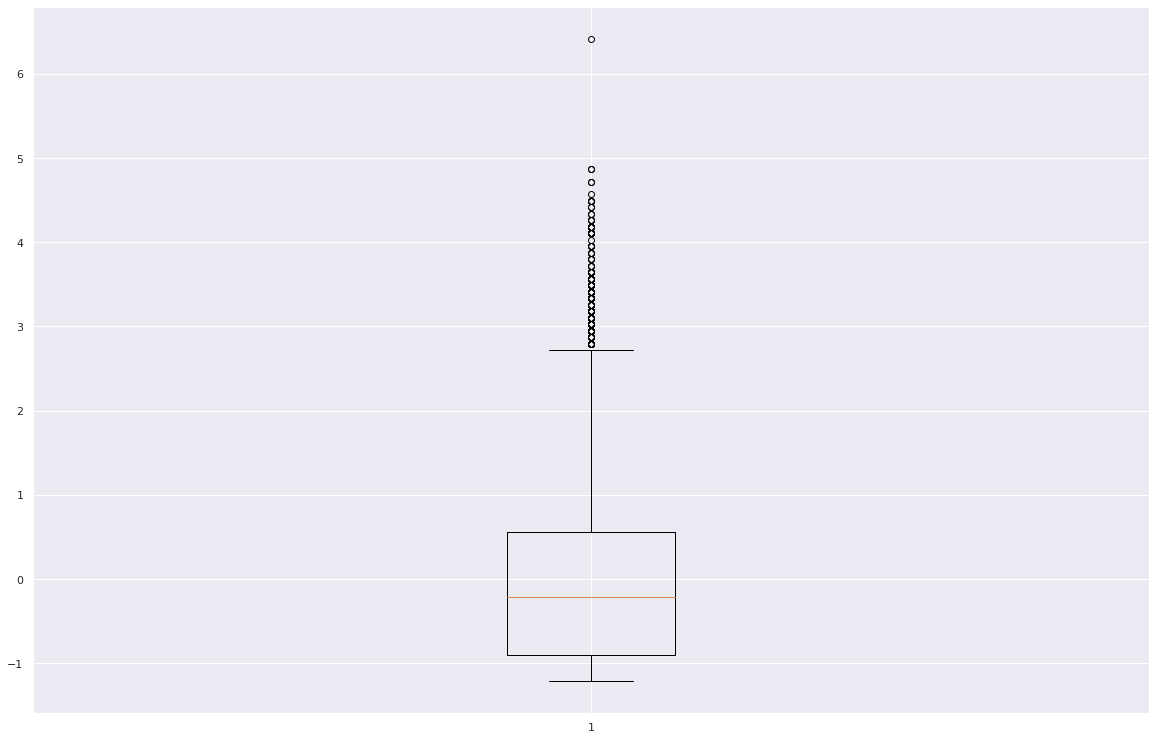

In [81]:
plt.boxplot(scaled_df["X1"],labels=None)

In [ ]:
from sklearn.decomposition import PCA

pcs=PCA()

pcs_t =pcs.fit_transform(scaled_df)
pcs_t[:5]


array([[-1.80075257e+00, -1.27254697e+00, -5.88668173e-01,
        -3.97486234e-01, -1.02212350e-01, -1.60908785e+00,
         2.69738750e+00,  1.16763368e-01, -5.27318475e-01,
        -2.13737538e-01, -1.85834593e-01, -7.76028724e-02,
         2.29608840e+00, -9.00374365e-01, -3.12166809e-01,
        -1.39714869e-01,  4.03765201e-01, -2.68693492e-01,
        -8.85436715e-01,  5.89593276e-01, -4.57709806e-02,
         1.62799580e-02,  1.61306013e-02,  1.04888517e-02],
       [-6.70128172e-01, -2.40841090e+00,  1.04215858e+00,
        -3.56008646e-01,  3.04660115e-01, -9.70705163e-01,
         7.85497461e-01,  2.88934808e-01, -9.72988659e-02,
        -1.59360991e-01,  1.13127251e-01,  1.62825120e-01,
        -1.39269230e+00, -1.19997970e-01, -2.90577553e-01,
         6.44311226e-01,  2.11754351e+00,  2.02549954e-02,
        -2.59164244e-01,  8.30495785e-01, -1.24408054e-01,
         4.01697655e-03,  3.05488286e-03,  6.46900713e-03],
       [-8.57916353e-01, -9.71228390e-01,  4.71521931e

In [ ]:
pcsSummary_df = pd.DataFrame({
                              "% varianza explicada": np.round(pcs.explained_variance_,4) * 100,
                              "% varianza acumulada": np.cumsum(pcs.explained_variance_ratio_) * 100
                             })
pcsSummary_df

,% varianza explicada,% varianza acumulada
0,655.25,27.301007
1,420.13,44.806002
2,155.30,51.276642
3,147.48,57.421529
4,104.09,61.758495
5,97.41,65.817036
6,91.57,69.632496
7,90.73,73.412725
8,88.64,77.105833
9,87.13,80.736255


In [ ]:
pcs_labels = [f"PC{i + 1}" for i in range(len(scaled_df.columns))]
pcsSummary_df.index=pcs_labels

pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,655.25,27.301007
PC2,420.13,44.806002
PC3,155.30,51.276642
PC4,147.48,57.421529
PC5,104.09,61.758495
PC6,97.41,65.817036
PC7,91.57,69.632496
PC8,90.73,73.412725
PC9,88.64,77.105833
PC10,87.13,80.736255


In [ ]:
pcs_df = pd.DataFrame(pcs_t, columns=pcs_labels)

print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  24.000801148312583
Varianza total de los componentes:  24.0008011483126


In [ ]:
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,655.25,27.301007
PC2,420.13,44.806002
PC3,155.30,51.276642
PC4,147.48,57.421529
PC5,104.09,61.758495
PC6,97.41,65.817036
PC7,91.57,69.632496
PC8,90.73,73.412725
PC9,88.64,77.105833
PC10,87.13,80.736255


In [ ]:
total_var =scaled_df.var().sum()

pd.DataFrame({
              "Porcentaje Varianza": (scaled_df.var()/total_var)*100,
              "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum()/total_var)*100
              })

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,4.166667,4.166667
X2,4.166667,8.333333
X3,4.166667,12.500000
X4,4.166667,16.666667
X5,4.166667,20.833333
X6,4.166667,25.000000
X7,4.166667,29.166667
X8,4.166667,33.333333
X9,4.166667,37.500000
X10,4.166667,41.666667


In [ ]:
comps_df = pd.DataFrame(
                      pcs.components_.round(4),
                      columns = pcs_df.columns,
                      index = scaled_df.columns
                      )
comps_df.iloc[:,:23]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
X1,0.0656,-0.0220,0.0198,-0.0056,0.0140,0.1646,0.1973,0.2034,0.2100,0.2137,...,0.3480,0.3522,0.3501,0.3429,0.0926,0.0773,0.0849,0.0764,0.0740,0.0687
X2,0.3117,0.0305,-0.0885,-0.0394,0.0628,-0.2967,-0.3280,-0.3349,-0.3344,-0.3212,...,0.1500,0.1492,0.1473,0.1453,0.1487,0.1387,0.1499,0.1400,0.1358,0.1281
X3,0.0100,0.0281,-0.3177,0.4676,-0.4777,-0.0207,0.0187,0.0638,0.0918,0.1118,...,-0.0811,-0.0680,-0.0546,-0.0459,0.2720,0.2901,0.2687,0.2274,0.1858,0.2004
X4,0.0766,-0.0795,0.2268,-0.4291,0.4472,0.0204,0.0480,0.0798,0.1035,0.1098,...,-0.1067,-0.1019,-0.0893,-0.0841,0.2896,0.3225,0.2903,0.2471,0.1856,0.2167
X5,-0.1982,0.7393,0.4512,-0.0270,-0.1394,-0.1113,-0.0519,-0.0025,0.0373,0.0549,...,0.0338,0.0235,0.0169,-0.0007,0.1181,0.1153,0.0260,-0.0141,-0.0965,-0.0717
X6,-0.2670,-0.6251,0.3911,0.2318,0.0047,-0.1340,-0.0613,-0.0165,0.0062,0.0171,...,0.0563,0.0396,0.0049,-0.0316,0.1742,0.1521,0.0648,-0.0874,-0.2104,-0.1322
X7,-0.2615,0.0074,0.4091,0.1898,-0.1401,0.2181,0.0431,-0.0892,-0.1959,-0.2347,...,0.0444,0.0286,0.0255,0.0365,0.0543,0.1600,0.1397,0.0986,0.0669,-0.1189
X8,0.0457,0.0752,-0.3156,-0.1201,0.0480,-0.0247,-0.0799,-0.0454,-0.0139,0.0424,...,0.0037,0.0737,0.0921,-0.0375,0.2128,0.1408,0.2769,0.0692,-0.6994,-0.4128
X9,-0.0267,-0.0480,0.0537,0.0104,0.0075,-0.0360,0.0050,-0.0079,-0.0146,0.0138,...,-0.1348,-0.0468,0.1047,0.1623,-0.2901,-0.2603,0.1869,0.6330,0.2329,-0.5008
X10,0.0227,0.0183,-0.1567,-0.0569,0.0476,-0.0328,-0.0340,-0.0110,0.0458,0.0564,...,0.0793,0.0265,-0.0694,0.0808,0.0354,0.3926,-0.0343,-0.4454,0.4747,-0.5970


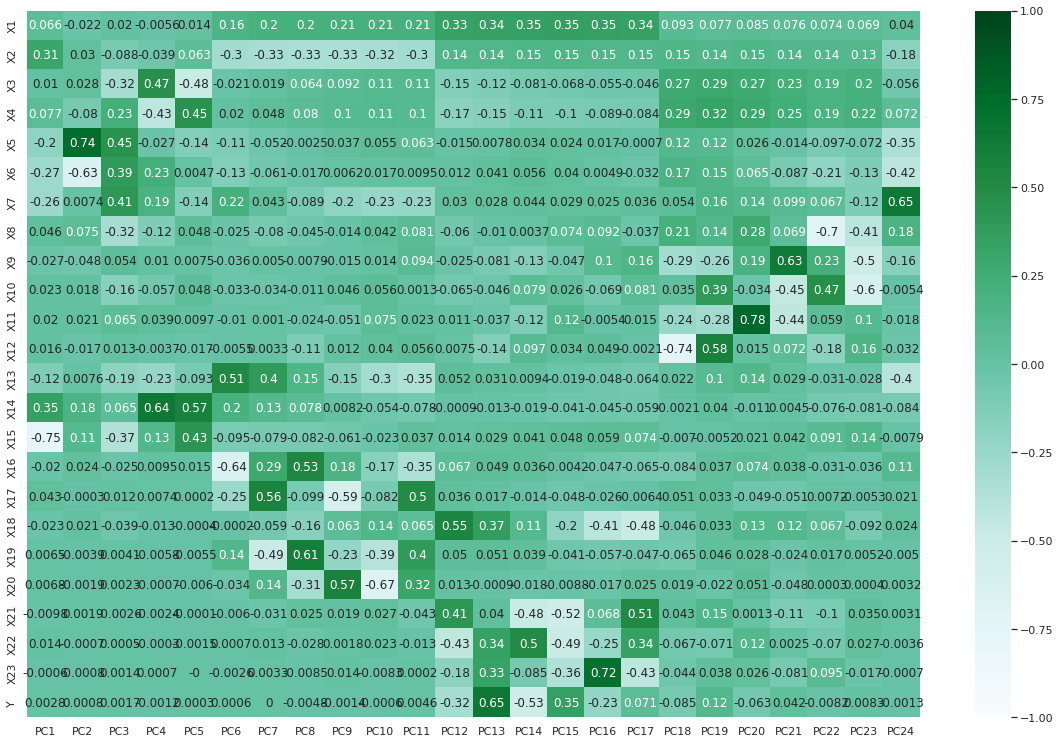

In [ ]:
np.trunc(comps_df)
sns.set(rc={"figure.figsize":(20,13)})
sns.heatmap(comps_df, vmin=-1, vmax=1, cmap ="BuGn", annot=True)

In [ ]:
comps_df.iloc[:,:16].abs().idxmax()

PC1     X15
PC2      X5
PC3      X5
PC4     X14
PC5     X14
PC6     X16
PC7     X17
PC8     X19
PC9     X17
PC10    X20
PC11    X17
PC12    X18
PC13      Y
PC14      Y
PC15    X21
PC16    X23
dtype: object

#¿Cuál es el número de componentes minímo y por qué?

No hay una única forma, pero la más generalizada sería tomar los componentes que expliquen al menos el 80% del cojunto de datos, entonces, ese sería el número mínimo de compotentes a considerar, que para nuestro caso serían 10, toda vez que con esos primeros componentes se alcanza el 80.7%. 

#¿Cuál es la variación de los datos que representan esos componentes?

La variación de los datos podremos obtenerla de la varianza y en promedio esta en 24.0 

#¿Cuál es la pérdida de información después de realizar PCA?

Ninguna, no se pierde información, lo que sucede en realidad es una reducción de la dimensión de las variables a usar, podría decirse que se compactan y en vez de usar las 23 variables de este caso, solamente se usan aquellas que son las que verdaderamente tienen un efecto en el análisis.

Adicionalmente, esto se puede corroborrar con la varianza de los datos orignales versus la varianza de los pesos de los componentes. En este caso es del 24.0.



#De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Las variables que tienen mayor importancia en los componentes principales son: La variable X5 y X11 tienen mayor importancia en los componentes PC2 y PC20 respectivamente. Por otro lado, los que tienen menor importancia son X23 en el componente PC1 y PC4. 

#¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

Cuando se tiene una gran cantidad de variables es recomendable utilizar el Análisis de Componentes Principales (PCA por sus siglas en inglés), el método de PCA ayuda a simplicar la información. 

El PCA tiene ventajas y beneficios para Machine Learning en cuanto a que puede optimizar el rendimiento de un modelo, por ejemplo, si se desea predecir una variable X de un conjunto de n observaciones y p variables, el modelo tendería a ser mucho mayor y esto alentaría la ejecución del algoritmo, por ello el PCA puede ayudar a solamente correr aquellas variables que tiene un mayor efecto, es decir, las variables más valiosas.

